<a href="https://colab.research.google.com/github/Pakhi27/Multiple-Linear-Regression-Training-pyTorch/blob/main/Multiple_Linear_Regression_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries and set the random seed

from torch import nn
import torch
torch.manual_seed(1)

In [ ]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [ ]:
# Define the parameters. torch.mm uses matrix multiplication instead of scaler multiplication.
# Define Prediction Function

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

In [ ]:
# Calculate yhat

x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


In [ ]:
# Each row of the following tensor represents a sample:

In [ ]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

In [ ]:
# Make the prediction of X

yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


In [ ]:
# Class Linear-We can use the linear class to make a prediction.

In [ ]:
# Make a linear regression model using build-in function

model = nn.Linear(2, 1)

In [ ]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.3969]], grad_fn=<AddmmBackward0>)


In [ ]:
# Predict with multiple samples X:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)


In [ ]:
# Build Custom Modules

In [ ]:
# Create linear_regression Class

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [ ]:
model = linear_regression(2, 1)
#w-2 columns,b-1

In [ ]:
# Print model parameters

print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


In [ ]:
# Print model parameters

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])


In [ ]:
# Now we input a 1x2 tensor, and we will get a 1x1 tensor.

In [ ]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward0>)


In [ ]:
# Make a prediction of X-for multiple samples(X)

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward0>)


In [ ]:
# Practice

In [ ]:
# Practice: Build a model to predict the follow tensor.

X = torch.tensor([[11.0, 12.0, 13, 14], [11, 12, 13, 14]])
w = torch.tensor([[2.0], [3.0],[4.0],[5.0]], requires_grad=True)

In [ ]:

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

In [ ]:
yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[181.],
        [181.]], grad_fn=<AddBackward0>)


In [ ]:
# MLR-training

In [ ]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Create a 2D dataset

class Data2D(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [ ]:

data_set = Data2D()

In [ ]:
# Create the Model, Optimizer, and Total Loss Function (Cost)

In [ ]:
# Create a customized linear

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [ ]:
# Create a model. Use two features: make the input size 2 and the output size 1:

In [ ]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.5303, 0.0084]], requires_grad=True), Parameter containing:
tensor([-0.3725], requires_grad=True)]


In [ ]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Create the cost function

criterion = nn.MSELoss()

In [ ]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

In [ ]:
# The function for plotting 2D-Use this function for plotting:

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [ ]:
# rain the Model via Mini-Batch Gradient Descent¶

In [ ]:
# Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration

In [ ]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)

Before Training: 


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Cost/total loss ')

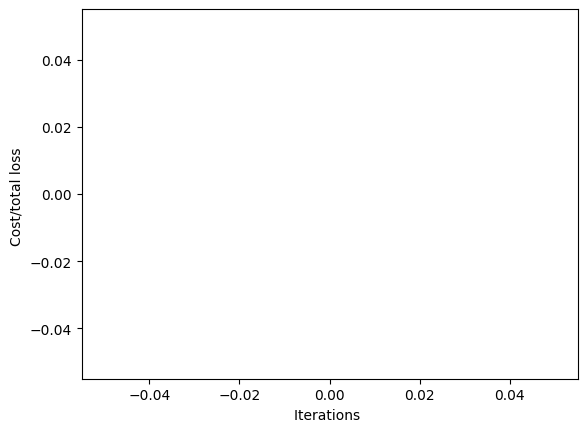

In [ ]:
# Plot out the Loss and iteration diagram
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [ ]:
from torch import nn
import torch

In [ ]:
torch.manual_seed(1)

In [ ]:
# set the random seed
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [ ]:
# create a linear regression object, as our input and output will be two we set the parameters accordingly

In [ ]:
# 1 input feature and 10 predictions..
model=linear_regression(1,10)
model(torch.tensor([1.0]))

tensor([ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
         1.0132,  0.1887], grad_fn=<ViewBackward0>)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [ ]:
x=torch.tensor([[1.0]])

In [ ]:
yhat=model(x)
yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward0>)

In [ ]:
# each row in the following tensor represents a different sample

In [ ]:
X=torch.tensor([[1.0],[1.0],[3.0]])

In [ ]:
Yhat=model(X)
Yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward0>)

In [ ]:
# Training

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(1)

In [ ]:
# Make Some Data
# Create a dataset class with two-dimensional features and two targets:

In [ ]:
# Creates a 2D tensor self.x of size (20, 2) filled with zeros.
# Populates the first column ([:,0]) of self.x with values from -1 to 1 with a step of 0.1 (20 evenly spaced values).
# Similarly, populates the second column ([:,1]) with values from -1 to 1 with a step of 0.1.
# Defines self.w as a weight tensor with the shape (2, 2). This represents the true weights for the linear relationship between the inputs and the target variable.
# Defines self.b as a bias tensor with the shape (1, 2). This represents the true biases for the linear relationship.
# Calculates the actual target values self.f by multiplying self.x with self.w and adding self.b.
# Adds some noise to the target values by adding a small random number from a normal distribution (0.001*torch.randn((self.x.shape[0],1))). This simulates real-world data with some inherent noise.
# Defines self.y as the final target tensor with noise added.
# # Sets self.len to the number of data points (length of self.x).
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b

            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]
# This function is called whenever you access an element of the dataset using indexing (e.g., data_set[index]).
# It takes an index as input and returns a tuple containing the input features and the corresponding target value from the dataset.
# In this case, it returns self.x[index] (features) and self.y[index] (target value) for the given index.
    def __getitem__(self,index):

        return self.x[index],self.y[index]
# This function defines the length of the dataset.
# It simply returns the value stored in self.len, which is the number of data points (20 in this case).
    def __len__(self):
        return self.len

In [ ]:
# create a dataset object
data_set=Data()

In [ ]:
# Create the Model, Optimizer, and Total Loss Function (cost)

In [ ]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
# This function defines the forward pass of the model. It takes the input features x as input.
# Performs a linear transformation on the input using the self.linear layer.
# Returns the predicted target values (yhat) from the linear layer.
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [ ]:
# Create an optimizer object and set the learning rate to 0.1

In [ ]:
# nitializes the superclass (nn.Module).
# Defines a linear layer self.linear using nn.Linear. It takes input_size (number of input features, 2 in this case) and output_size (number of output predictions, 2 in this case) as arguments.
model=linear_regression(2,2)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
# Create the criterion function that calculates the total loss or cost:
criterion = nn.MSELoss()

In [ ]:
# Create a data loader object and set the batch_size to 5:
# Defines a DataLoader named train_loader.
# It takes the data_set (your custom dataset) and a batch_size of 5 as arguments.
# The DataLoader will shuffle the data (optional) and provide batches of data during training.
train_loader=DataLoader(dataset=data_set,batch_size=5)

In [ ]:
# Train the Model via Mini-Batch Gradient Descent

In [ ]:
# Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.

In [ ]:
LOSS=[]

epochs=100

for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost
        LOSS.append(loss.item())
        #clear gradient
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()


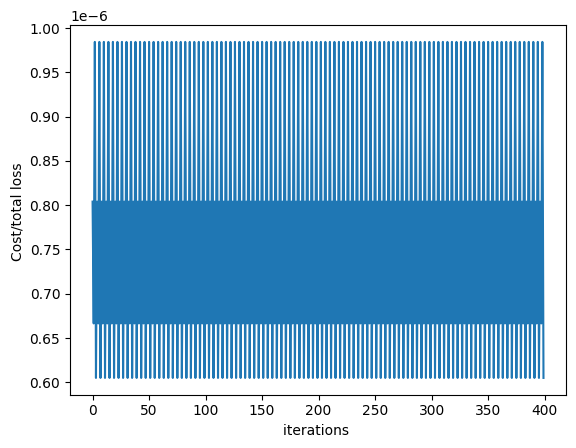

In [ ]:
# Plot the cost
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()